In [1]:
import torch 
import torch.nn as nn
import os 
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import pickle
import sys


In [2]:
current_dir = os.path.dirname(os.path.realpath('__file__'))
new_path = os.path.join(current_dir, '..')
sys.path.append(new_path)

In [3]:
from src.DataSet import Mapillary_Vistas_Segmentation_Data

path = r'../Data'

training_data1_path = os.path.join(path,r'data1/training')

# Mapillary Vistas Dataset için transform pipeline
transform = transforms.Compose([
    transforms.Resize((256, 512)),  # Görüntüleri sabit bir boyuta getir (örneğin 256x512)
    transforms.ToTensor(),          # Görüntüyü tensor'a çevir (0-255 aralığından 0-1 aralığına)
    transforms.Normalize(           # Normalizasyon (ImageNet ortalamaları ve standart sapmaları)
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    )
])

# Etiketler (segmentasyon maskeleri) için transform (normalizasyon gerekmez)
target_transform = transforms.Compose([
    transforms.Resize((256, 512), interpolation=transforms.InterpolationMode.NEAREST),  # Maskeler için nearest interpolation
    transforms.ToTensor()  # Maskeyi tensor'a çevir
])
training_data1 = Mapillary_Vistas_Segmentation_Data(training_data1_path,transform,target_transform)

for image,label in training_data1:
    print(image.shape)
    print(label.shape)
    break

print('len_training_data1: ',len(training_data1))

train_DataLoader = torch.utils.data.DataLoader(training_data1,batch_size=8,shuffle=True)

torch.Size([3, 256, 512])
torch.Size([1, 256, 512])
len_training_data1:  18000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


TypeError: Invalid shape (1, 256, 512) for image data

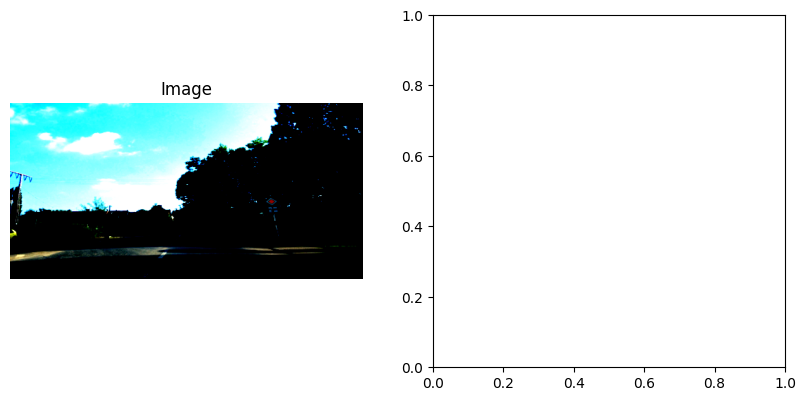

In [4]:
import matplotlib.pyplot as plt

num_examples = 3  

for i in range(num_examples):
    image, label = training_data1[i]
    
    image_np = image.permute(1, 2, 0).numpy()
    label_np = label.numpy()
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image_np)
    axs[0].set_title('Image')
    axs[0].axis('off')
    
    axs[1].imshow(label_np)
    axs[1].set_title('Label')
    axs[1].axis('off')
    
    plt.show()

In [6]:
validation_data1_path = os.path.join(path,r'data1/validation')

validation_data1 = Mapillary_Vistas_Segmentation_Data(validation_data1_path,transform,target_transform)

for image,label in validation_data1:
    print(image.shape)
    print(label.shape)
    break

print('len_validation_data1: ',len(validation_data1))

validation_DataLoader = torch.utils.data.DataLoader(validation_data1,batch_size=8,shuffle=True)

for image,label in validation_DataLoader:
    print(image.shape)
    print(label.shape)
    break

torch.Size([3, 256, 512])
torch.Size([1, 256, 512])
len_validation_data1:  2000
torch.Size([8, 3, 256, 512])
torch.Size([8, 1, 256, 512])


In [7]:
from src.UNetModel import UnetModel
from src.ModelTraining import ModelTraining

model = UnetModel()

ModelTraining.model_train(model,train_DataLoader,validation_DataLoader,50)




Epoch 1/50 [Train]:   0%|          | 0/2250 [00:00<?, ?it/s]


RuntimeError: only batches of spatial targets supported (3D tensors) but got targets of dimension: 4